# Loan Default Prediction

## Introduction
Financial loan services are widely utilized by various industries, including banks, financial institutions, and government organizations. These services aim to reduce payment defaults and ensure timely repayments. Machine learning plays a crucial role in predicting which individuals are at high risk of defaulting on their loans, enabling organizations to take preventive measures efficiently.

This project tackles a loan default prediction problem using machine learning techniques. We analyze the dataset to compare the performance of seven different models and determine the most effective approach for predicting defaults.

## Dataset Description
The dataset has been sourced from Coursera's Loan Default Prediction Challenge and comprises:
- **Total Rows:** 255,347
- **Total Columns:** 18

## Objective
The objective is to build and compare machine learning models to predict loan defaults and identify the best-performing model for this dataset.

Data pre-processing

In [ ]:
# inlcude all libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [54]:
# ignore warnings
warnings.filterwarnings("ignore")

# Load the datasets
train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv")

In [55]:
# dropping LoanID column as it wont contribute anything

X = train_data.drop(['LoanID','Default'], axis=1)
y = train_data['Default']
print("loanID column removed.")

# Remove loanID column
Y = test_data.drop(['LoanID'], axis=1)
print("loanID column removed.")

loanID column removed.
loanID column removed.


Training Data

In [56]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes
204273,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes
204274,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No
204275,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No


In [57]:
X.shape

(204277, 16)

In [58]:
X.drop_duplicates(inplace=True)
train_data.shape
# As there is no change, there are duplicates

(204277, 18)

In [59]:
X.isna().sum()
#finding if there are any null values
#since all are 0s, there are no null values

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

Test Data

In [60]:
Y

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [61]:
Y.shape

(51070, 16)

In [62]:
Y.drop_duplicates(inplace=True)
Y.shape
# As there is no change, there are duplicates

(51070, 16)

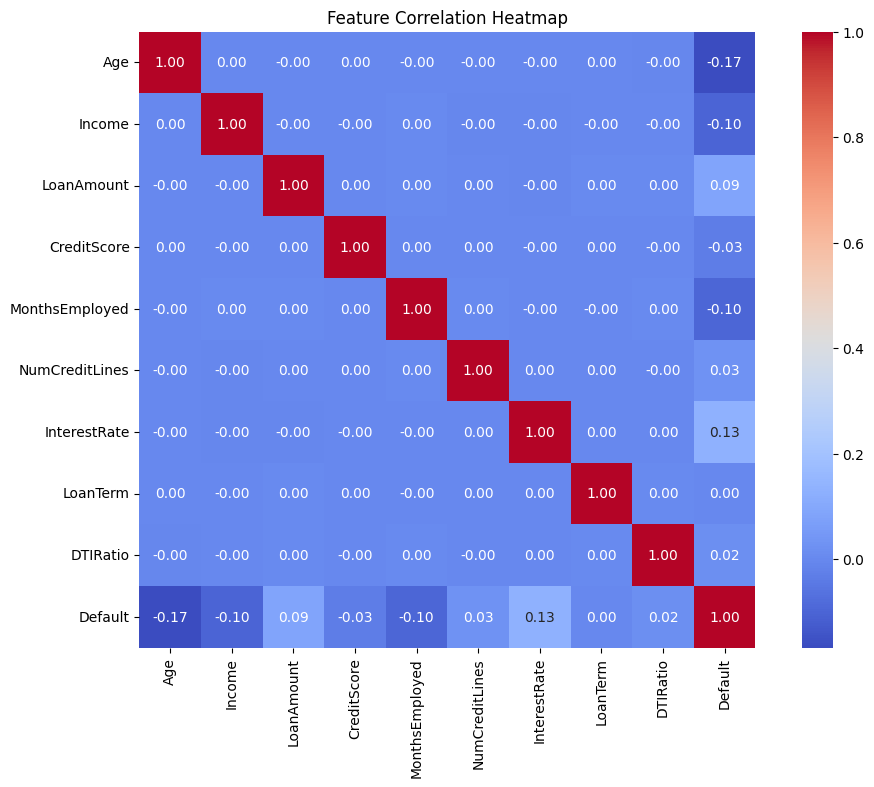

In [63]:
# Select only numeric columns for the correlation matrix
numeric_data = train_data.select_dtypes(include=['number'])

# Plot the heatmap for feature correlation
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            square=True, 
            cbar=True)

plt.title('Feature Correlation Heatmap')
plt.show()


<Axes: xlabel='Default'>

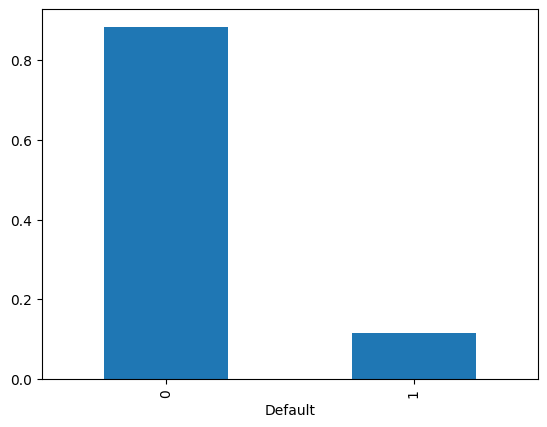

In [64]:
train_data['Default'].value_counts(normalize=True).plot(kind='bar')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'MonthsEmployed'}>,
        <Axes: title={'center': 'NumCreditLines'}>],
       [<Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'DTIRatio'}>]], dtype=object)

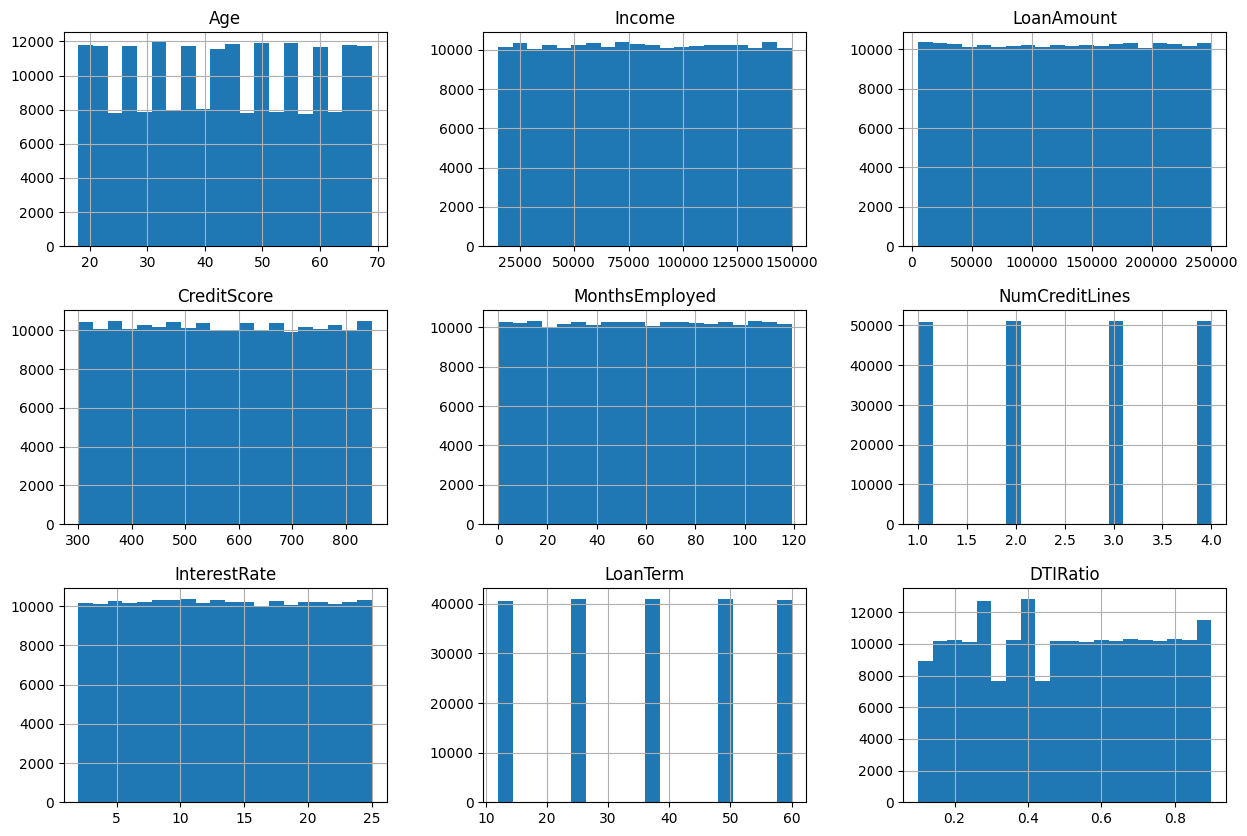

In [65]:
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
train_data[numeric_columns].hist(bins=20, figsize=(15,10))

Outlier detection

In [66]:
# # Importing necessary libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler

# # Function to normalize numerical columns in a DataFrame
# def normalize_columns(df):
#     scaler = MinMaxScaler()
#     df_normalized = df.copy()
#     for column in df.columns:
#         if df[column].dtype in ['int64', 'float64']:
#             df_normalized[column] = scaler.fit_transform(df[[column]])
#     return df_normalized

# # Function to plot numerical and categorical data
# def plot_data(df, df_name):
#     for column in df.columns:
#         # Check if the column is numerical
#         if df[column].dtype in ['int64', 'float64']:
#             plt.figure(figsize=(8, 5))
#             sns.boxplot(data=df[column])
#             plt.title(f'Normalized Boxplot of {column} in {df_name}')
#             plt.xlabel(column)
#             plt.show()
#         # Check if the column is categorical
#         elif df[column].dtype == 'object':
#             plt.figure(figsize=(8, 5))
#             sns.countplot(data=df, x=column)
#             plt.title(f'Frequency of Categories in {column} ({df_name})')
#             plt.xlabel(column)
#             plt.ylabel('Frequency')
#             plt.xticks(rotation=45)  # Rotate labels for readability
#             plt.show()

# # Normalize the numerical columns in X and Y
# X_normalized = normalize_columns(X)
# Y_normalized = normalize_columns(Y)

# # Plotting data for normalized X and Y
# plot_data(X_normalized, "X")
# plot_data(Y_normalized, "Y")



CATEGORICAL COLUMNS

In [67]:
# Find categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Display unique categories and their counts for each categorical variable
for col in categorical_columns:
    print(f"Column: {col}")
    print(X[col].value_counts())
    print("\n")

Column: Education
Education
Bachelor's     51483
High School    51046
PhD            50980
Master's       50768
Name: count, dtype: int64


Column: EmploymentType
EmploymentType
Part-time        51460
Unemployed       50994
Full-time        50921
Self-employed    50902
Name: count, dtype: int64


Column: MaritalStatus
MaritalStatus
Married     68217
Divorced    68137
Single      67923
Name: count, dtype: int64


Column: HasMortgage
HasMortgage
Yes    102145
No     102132
Name: count, dtype: int64


Column: HasDependents
HasDependents
Yes    102180
No     102097
Name: count, dtype: int64


Column: LoanPurpose
LoanPurpose
Business     40984
Home         40878
Education    40855
Other        40829
Auto         40731
Name: count, dtype: int64


Column: HasCoSigner
HasCoSigner
Yes    102196
No     102081
Name: count, dtype: int64




In [68]:
# Find categorical columns
categorical_columns = Y.select_dtypes(include=['object']).columns

# Display unique categories and their counts for each categorical variable
for col in categorical_columns:
    print(f"Column: {col}")
    print(Y[col].value_counts())
    print("\n")

Column: Education
Education
Bachelor's     12883
High School    12857
Master's       12773
PhD            12557
Name: count, dtype: int64


Column: EmploymentType
EmploymentType
Unemployed       12830
Self-employed    12804
Full-time        12735
Part-time        12701
Name: count, dtype: int64


Column: MaritalStatus
MaritalStatus
Single      17089
Married     17085
Divorced    16896
Name: count, dtype: int64


Column: HasMortgage
HasMortgage
No     25538
Yes    25532
Name: count, dtype: int64


Column: HasDependents
HasDependents
Yes    25562
No     25508
Name: count, dtype: int64


Column: LoanPurpose
LoanPurpose
Home         10408
Business     10314
Education    10150
Auto         10113
Other        10085
Name: count, dtype: int64


Column: HasCoSigner
HasCoSigner
No     25565
Yes    25505
Name: count, dtype: int64




In [69]:
# Define a mapping for Education categories
Education_mapping = {
    'High School':1,
    "Bachelor's":2,
    "Master's":3,            
    'PhD':4
}

# Apply the mapping to the Education column
X['Education'] = X['Education'].map(Education_mapping)

print("Education column with manual encoding:")
print(X[['Education']].head())

# Apply the mapping to the Education column
Y['Education'] = Y['Education'].map(Education_mapping)

print("Education column with manual encoding:")
print(Y[['Education']].head())

Education column with manual encoding:
   Education
0          1
1          1
2          3
3          2
4          2
Education column with manual encoding:
   Education
0          4
1          1
2          3
3          1
4          4


In [70]:
# Define a mapping for EmploymentType categories
EmploymentType_mapping = {
    'Part-time':1,
    'Full-time':2,
    'Unemployed':3,            
    'Self-employed':4
}

# Apply the mapping to the EmploymentType column
X['EmploymentType'] = X['EmploymentType'].map(EmploymentType_mapping)

print("EmploymentType column with manual encoding:")
print(X[['EmploymentType']].head())

# Apply the mapping to the Education column
Y['EmploymentType'] = Y['EmploymentType'].map(EmploymentType_mapping)

print("EmploymentType column with manual encoding:")
print(Y[['EmploymentType']].head())

EmploymentType column with manual encoding:
   EmploymentType
0               4
1               3
2               4
3               4
4               1
EmploymentType column with manual encoding:
   EmploymentType
0               4
1               1
2               1
3               1
4               3


In [71]:
# Define a mapping for MaritalStatus categories
MaritalStatus_mapping = {
    'Single':1,
    'Divorced':2,
    'Married':3,
}

# Apply the mapping to the MaritalStatus column
X['MaritalStatus'] = X['MaritalStatus'].map(MaritalStatus_mapping)

print("MaritalStatus column with manual encoding:")
print(X[['MaritalStatus']].head())

# Apply the mapping to the MaritalStatus column
Y['MaritalStatus'] = Y['MaritalStatus'].map(MaritalStatus_mapping)

print("MaritalStatus column with manual encoding:")
print(Y[['MaritalStatus']].head())

MaritalStatus column with manual encoding:
   MaritalStatus
0              1
1              2
2              3
3              1
4              1
MaritalStatus column with manual encoding:
   MaritalStatus
0              1
1              2
2              3
3              1
4              1


In [72]:
# Define a mapping for HasMortgage categories
HasMortgage_mapping = {
    'Yes':1,
    'No':0,
}

# Apply the mapping to the HasMortgage column
X['HasMortgage'] = X['HasMortgage'].map(HasMortgage_mapping)

print("HasMortgage column with manual encoding:")
print(X[['HasMortgage']].head())

# Apply the mapping to the HasMortgage column
Y['HasMortgage'] = Y['HasMortgage'].map(HasMortgage_mapping)

print("HasMortgage column with manual encoding:")
print(Y[['HasMortgage']].head())


HasMortgage column with manual encoding:
   HasMortgage
0            1
1            0
2            0
3            1
4            0
HasMortgage column with manual encoding:
   HasMortgage
0            1
1            1
2            1
3            0
4            0


In [73]:
# Define a mapping for HasDependents categories
HasDependents_mapping = {
    'Yes':1,
    'No':0,
}

# Apply the mapping to the HasDependents column
X['HasDependents'] = X['HasDependents'].map(HasDependents_mapping)

print("HasDependents column with manual encoding:")
print(X[['HasDependents']].head())

# Apply the mapping to the HasDependents column
Y['HasDependents'] = Y['HasDependents'].map(HasDependents_mapping)

print("HasDependents column with manual encoding:")
print(Y[['HasDependents']].head())

HasDependents column with manual encoding:
   HasDependents
0              0
1              1
2              0
3              0
4              1
HasDependents column with manual encoding:
   HasDependents
0              1
1              1
2              1
3              0
4              1


In [74]:
# Define a mapping for LoanPurpose categories
LoanPurpose_mapping = {
    'Business':1,
    'Education':2,
    'Other':3,
    'Auto':4,
    'Home':5
}

# Apply the mapping to the LoanPurpose column
X['LoanPurpose'] = X['LoanPurpose'].map(LoanPurpose_mapping)

print("LoanPurpose column with manual encoding:")
print(X[['LoanPurpose']].head())

# Apply the mapping to the LoanPurpose column
Y['LoanPurpose'] = Y['LoanPurpose'].map(LoanPurpose_mapping)

print("LoanPurpose column with manual encoding:")
print(Y[['LoanPurpose']].head())

LoanPurpose column with manual encoding:
   LoanPurpose
0            1
1            2
2            3
3            4
4            2
LoanPurpose column with manual encoding:
   LoanPurpose
0            5
1            2
2            2
3            1
4            1


In [75]:
# Define a mapping for HasCoSigner categories
HasCoSigner_mapping = {
    'Yes':1,
    'No':0
}

# Apply the mapping to the HasCoSigner column
X['HasCoSigner'] = X['HasCoSigner'].map(HasCoSigner_mapping)

print("HasCoSigner column with manual encoding:")
print(X[['HasCoSigner']].head())

Y['HasCoSigner'] = Y['HasCoSigner'].map(HasCoSigner_mapping)

print("HasCoSigner column with manual encoding:")
print(Y[['HasCoSigner']].head())

HasCoSigner column with manual encoding:
   HasCoSigner
0            0
1            0
2            1
3            1
4            1
HasCoSigner column with manual encoding:
   HasCoSigner
0            0
1            1
2            1
3            1
4            1


In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_scaled = scaler.transform(Y)


## Methodology
1. **Exploratory Data Analysis (EDA):**
   - Understand the distribution of features.
   - Identify and handle missing values (if any).
   - Perform feature engineering where necessary.

2. **Modeling:**
   - Train  different machine learning models.
   - Evaluate the performance of each model based on accuracy, precision, recall, and F1-score.

3. **Comparison and Results:**
   - Compare model metrics and select the best-performing model in kaggle scores.
   - Provide insights into the features contributing most to the predictions.



In [77]:
# Updated KNN hyperparameter tuning with RandomizedSearchCV
models_params = {
    # 'Decision Tree': {
    #     'model': DecisionTreeClassifier(random_state=42),
    #     'params': {
    #         'max_depth': [None, 10, 20],
    #         'min_samples_split': [2, 5],
    #         'min_samples_leaf': [1, 2],
    #         'class_weight': ['balanced']
    #     }
    # },
    # 'XGBoost': {
    #     'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    #     'params': {
    #         'learning_rate': [0.01, 0.1],
    #         'max_depth': [3, 6],
    #         'n_estimators': [100, 200]
    #     }
    # },
    # 'KNN': {
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': np.arange(3, 11),  # More flexible range
    #         'weights': ['uniform', 'distance'],
    #         'p': [1, 2]
    #     }
    # },
    # 'Naive Bayes': {
    #     'model': GaussianNB(),
    #     'params': {}
    # },
    # 'Logistic Regression': {
    #     'model': LogisticRegression(random_state=42, max_iter=5000),
    #     'params': {
    #         'penalty': ['l1', 'l2'],
    #         'C': [0.1, 1],
    #         'solver': ['saga']
    #     }
    # },
    'Neural Network': {
        'model': MLPClassifier(random_state=42, max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50, 50)],
            'activation': ['tanh'],
            'alpha': [0.0001],
            'learning_rate': ['constant']
        }
    }
    # ,
    # 'SVM': {
    #     'model': SVC(random_state=42),
    #     'params': {
    #         'C': [1],
    #         'kernel': ['linear'],
    #         'gamma': ['scale', 'auto']
    #     }
    # }
}

In [78]:
# Train models and collect results
results = {}
for name, model_data in models_params.items():
    print(f"Training {name}...")
    if model_data['params']:  # Use RandomizedSearchCV for KNN
        search_cv = RandomizedSearchCV(
            model_data['model'],
            model_data['params'],
            n_iter=10,  # Limit the number of parameter combinations
            cv=5,
            scoring='f1',
            n_jobs=-1,
            random_state=42
        ) if name == 'KNN' else GridSearchCV(
            model_data['model'],
            model_data['params'],
            cv=5,
            scoring='f1',
            n_jobs=-1
        )
        search_cv.fit(X_train_scaled, y_train)
        best_model = search_cv.best_estimator_
        print(f"Best parameters for {name}: {search_cv.best_params_}")
    else:  # For Naive Bayes or other non-grid models
        best_model = model_data['model']
        best_model.fit(X_train_scaled, y_train)

    y_pred = best_model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    results[name] = best_model

Training Neural Network...
Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
Neural Network Accuracy: 0.8795280986880752
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     36073
           1       0.43      0.09      0.16      4783

    accuracy                           0.88     40856
   macro avg       0.66      0.54      0.55     40856
weighted avg       0.84      0.88      0.84     40856



In [79]:
# Save predictions to separate files
def save_predictions_to_file(test_data, results, Y_scaled):
    for name, model in results.items():
        predictions = {
            'LoanID': test_data['LoanID'],
            'Default': model.predict(Y_scaled)
        }
        predictions_df = pd.DataFrame(predictions)
        file_name = f'{name}_predictions.csv'
        predictions_df.to_csv(file_name, index=False)
        print(f"Predictions saved to '{file_name}'.")



Predictions saved to 'Neural Network_predictions.csv'.


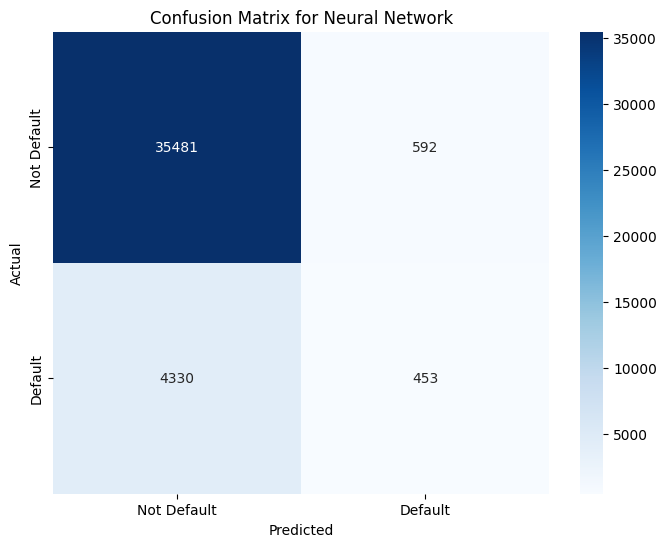

In [80]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Generate and save predictions for each model
save_predictions_to_file(test_data, results, Y_scaled)

# Plot confusion matrices for each model
for name, model in results.items():
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)
